In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
# loop through ./data/joined_dataframe, only work with csv files
dirname = os.path.join(os.getcwd(), 'data', 'non_encoded_joined_dataframe')
ext = ('.csv')

files = []
for file in os.listdir(dirname):
    if file.endswith(ext):
        files.append(file)
    else:
        continue
files

['part-00000-71966086-b26d-4256-af0a-a65045d2609e-c000.csv']

In [10]:
df = pd.read_csv(os.path.join(dirname, files[0]))
print(df.columns)

Index(['article_id', 'customer_id', 't_dat', 'price', 'sales_channel_id',
       'club_member_status_active', 'club_member_status_left_club',
       'club_member_status_precreate', 'club_member_status_nan',
       'fashion_news_frequency_monthly', 'fashion_news_frequency_regularly',
       'fashion_news_frequency_nan', 'age', 'postal_code',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'section_name', 'garment_group_name'],
      dtype='object')


### Sort articles from most profitable to least

In [14]:
df_revenue = df.groupby('article_id')['price'].sum().reset_index().rename(columns={'price':'revenue'})

# Merge revenue back into original dataframe
df_merged = pd.merge(df, df_revenue, on='article_id')

# Group by color, shade, and item type, and sum up revenue
df_profitable = df_merged.groupby(['colour_group_name', 'graphical_appearance_name', 'product_group_name'])['revenue'].sum().reset_index()

# Sort by revenue in descending order
df_profitable = df_profitable.sort_values(by='revenue', ascending=False)

# Output the top 10 most profitable stats
top_profitable_stats = df_profitable.head(1000)

print(top_profitable_stats.head(10))

   colour_group_name graphical_appearance_name  product_group_name  \
10             black                     solid        socks_tights   
7              black                     solid  garment_lower_body   
57             white                     solid        socks_tights   
8              black                     solid  garment_upper_body   
33       light_beige                     solid           underwear   
37        light_grey                   melange        socks_tights   
56             white                     solid  garment_upper_body   
11             black                     solid           underwear   
58             white                     solid           underwear   
9              black                     solid               items   

         revenue  
10  5.705830e+06  
7   4.078015e+06  
57  1.633224e+06  
8   4.778528e+05  
33  3.393966e+05  
37  2.943770e+05  
56  2.605168e+05  
11  2.052302e+05  
58  7.580080e+04  
9   1.762549e+04  


# Get most profitable colors, graphical appearances, product groups

In [33]:
def get_most_profitable_stats(df):

    top10_color = df.groupby('colour_group_name')['revenue'].sum().nlargest(10)
    top10_graphical = df.groupby('graphical_appearance_name')['revenue'].sum().nlargest(10)
    top10_product = df.groupby('product_group_name')['revenue'].sum().nlargest(10)


    # Plot bar charts for each category
    fig, ax = plt.subplots(3, 1, figsize=(8, 12))

    ax[0].bar(top10_color.index, top10_color.values)
    ax[0].set_title('Top 10 Revenue Generating Colors')
    ax[0].set_ylabel('Revenue')
    ax[0].tick_params(axis='x', labelrotation=45)

    ax[1].bar(top10_graphical.index, top10_graphical.values)
    ax[1].set_title('Top 10 Revenue Generating Graphical Appearances')
    ax[1].set_ylabel('Revenue')
    ax[1].tick_params(axis='x', labelrotation=45)

    ax[2].bar(top10_product.index, top10_product.values)
    ax[2].set_title('Top 10 Revenue Generating Product Groups')
    ax[2].set_ylabel('Revenue')
    ax[2].tick_params(axis='x', labelrotation=45)

    # Adjust labels to avoid overlapping
    plt.tight_layout()

    plt.show()
    


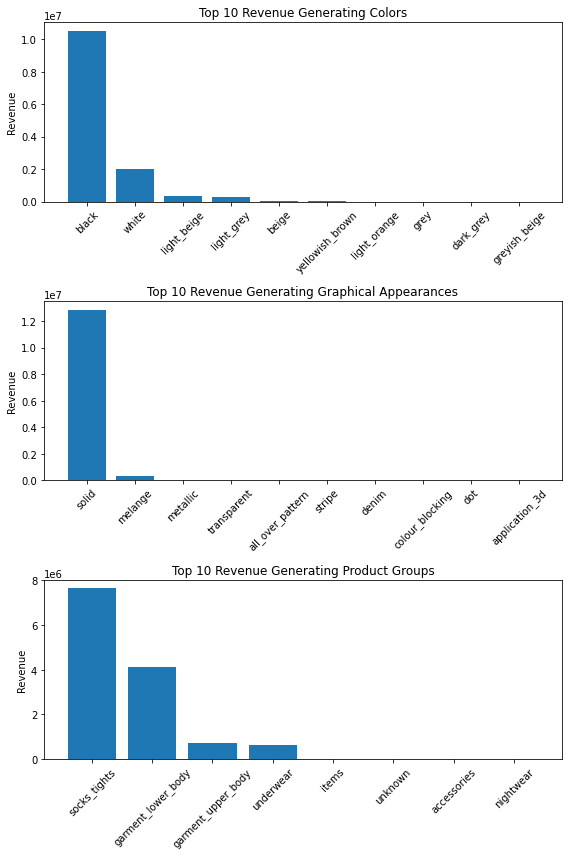

In [34]:
get_most_profitable_stats(df_profitable)

# Get the most profitable statistics, but now by season

Winter


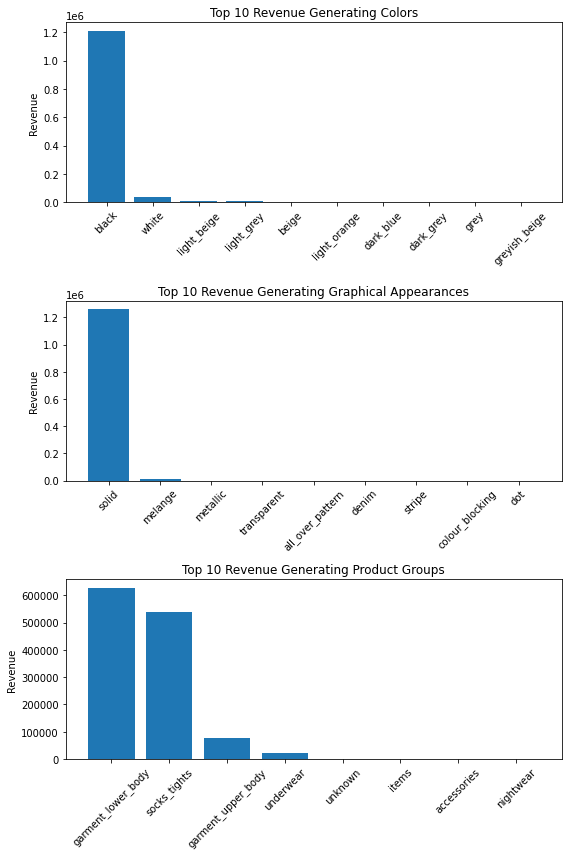

Spring


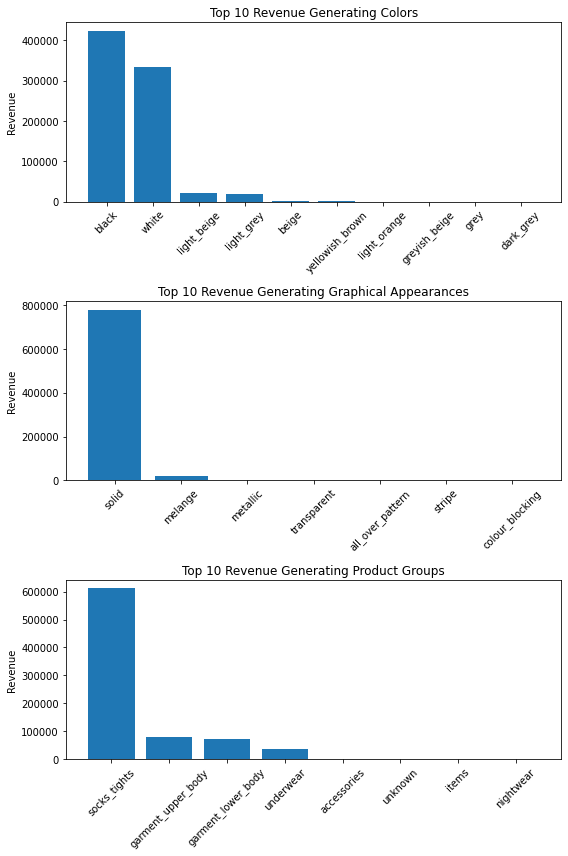

Summer


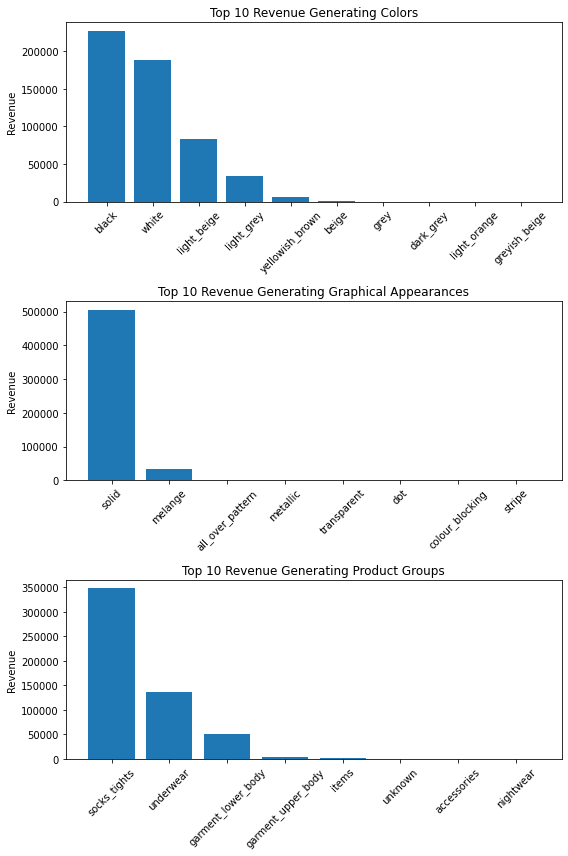

Fall


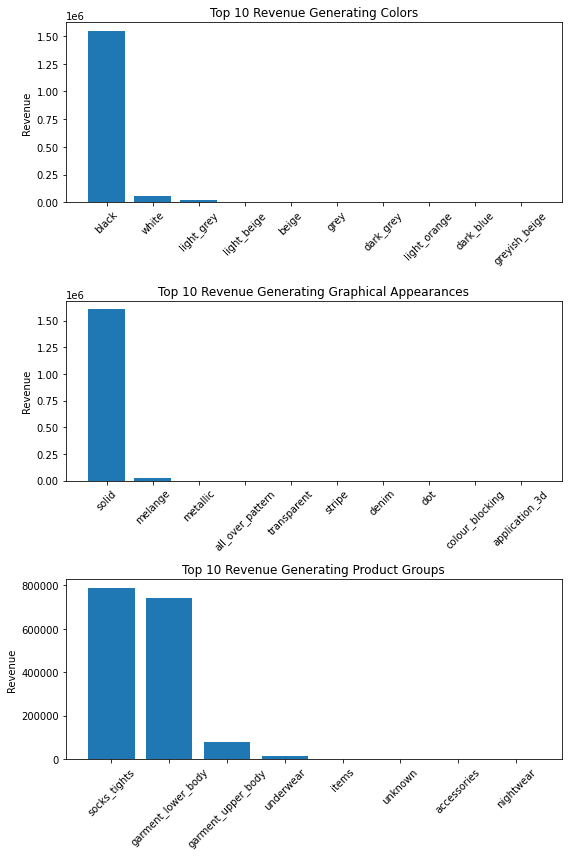

In [36]:
df['season'] = pd.DatetimeIndex(df['t_dat']).month.map({
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall'
})

# Create a new dataframe for each season
df_winter = df[df['season'] == 'Winter']
df_spring = df[df['season'] == 'Spring']
df_summer = df[df['season'] == 'Summer']
df_fall = df[df['season'] == 'Fall']


for df_i, s in zip([df_winter, df_spring, df_summer, df_fall], ["Winter", "Spring", "Summer", "Fall"]):
    df_revenue_i = df_i.groupby('article_id')['price'].sum().reset_index().rename(columns={'price':'revenue'})

    # Merge revenue back into original dataframe
    df_merged_i = pd.merge(df_i, df_revenue_i, on='article_id')

    # Group by color, shade, and item type, and sum up revenue
    df_profitable_i = df_merged_i.groupby(['colour_group_name', 'graphical_appearance_name', 'product_group_name'])['revenue'].sum().reset_index()

    # Sort by revenue in descending order
    df_profitable_i = df_profitable_i.sort_values(by='revenue', ascending=False)
    
    print(s)
    get_most_profitable_stats(df_profitable_i)
    